In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('cleaned_star_data.csv')

print(f"Розмір датасета: {df.shape}")

df = df.replace([' ', '-', 'Unknown', 'none', 'NaN'], np.nan)
pd.set_option('display.max_rows', None)

df = df.drop(0)

df = df.reset_index(drop=True)
cols_to_fix = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()
medians = df.median(numeric_only=True)

df = df.fillna(medians)

df['Star color'] = df['Star color'].fillna(df['Star color'].mode()[0])
df['Spectral Class'] = df['Spectral Class'].fillna(df['Spectral Class'].mode()[0])

print("Кількість пропусків після заповнення:")
print(df.isnull().sum())

le = LabelEncoder()

text_cols = ['Star color', 'Spectral Class']

for col in text_cols:

    df[col] = le.fit_transform(df[col].astype(str))

df.info()

X = df.drop('Star type', axis=1)
y = df['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df

Розмір датасета: (240, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         237 non-null    float64
 1   Luminosity(L/Lo)        233 non-null    float64
 2   Radius(R/Ro)            232 non-null    float64
 3   Absolute magnitude(Mv)  234 non-null    float64
 4   Star type               239 non-null    float64
 5   Star color              233 non-null    object 
 6   Spectral Class          237 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.2+ KB
Кількість пропусків після заповнення:
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042.0,0.000500,0.15420,16.600,0.0,2,5
1,2600.0,0.000300,0.10200,18.700,0.0,2,5
2,2800.0,0.000200,0.83000,16.650,0.0,2,5
3,1939.0,0.000138,0.10300,20.060,0.0,2,5
4,2840.0,0.153000,0.11000,16.980,0.0,2,5
5,2637.0,0.000730,0.12700,17.220,0.0,2,5
6,2600.0,0.000400,0.09600,17.400,0.0,2,5
7,2650.0,0.000690,0.11000,17.450,0.0,2,5
8,2700.0,0.000180,0.13000,16.050,0.0,2,5
9,3600.0,0.153000,0.51000,10.690,1.0,2,5


In [23]:
# Використовуємо найкращі параметри SVM з Lab1
best_params = {'C': 10, 'gamma': 1, 'kernel': 'linear'}

# Навчання на початкових даних (6 ознак)
model_full = SVC(**best_params, random_state=42)
start_full = time.time()
model_full.fit(X_train, y_train)
time_full = time.time() - start_full
acc_full = accuracy_score(y_test, model_full.predict(X_test))

# Зниження розмірності через PCA (до 2 компонент)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Навчання на стиснутих даних (2 компоненти)
model_pca = SVC(**best_params, random_state=42)
start_pca = time.time()
model_pca.fit(X_train_pca, y_train)
time_pca = time.time() - start_pca
acc_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))

In [24]:
print("Порівняння РСА: ")
print(f"Початкові дані (6 ознак): Точність = {acc_full:.4f}, Час = {time_full:.6f} сек")
print(f"Дані після PCA (2 комп.): Точність = {acc_pca:.4f}, Час = {time_pca:.6f} сек")

Порівняння РСА: 
Початкові дані (6 ознак): Точність = 0.9792, Час = 0.015095 сек
Дані після PCA (2 комп.): Точність = 0.8542, Час = 0.001116 сек


In [25]:
# Застосовуємо t-SNE для 2D візуалізації
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train)

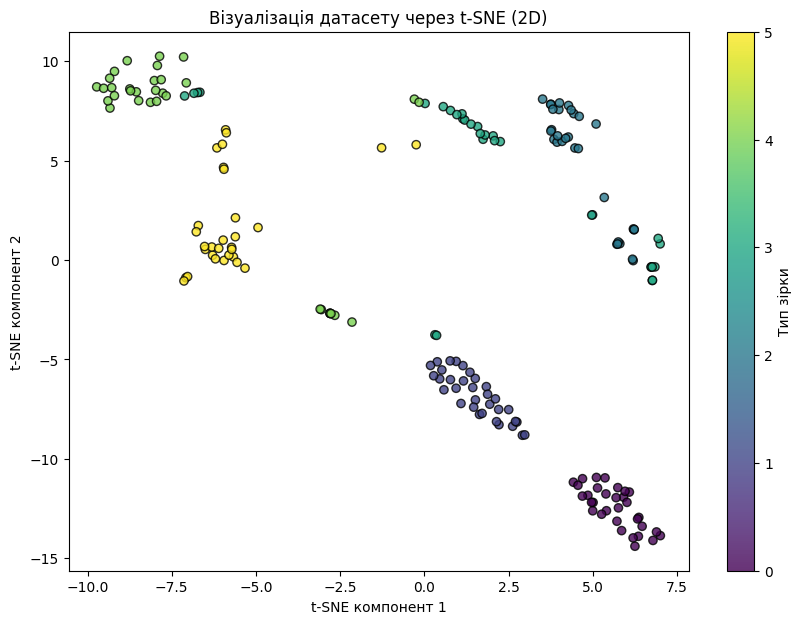

In [26]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', edgecolors='k', alpha=0.8)
plt.colorbar(scatter, label='Тип зірки')
plt.title("Візуалізація датасету через t-SNE (2D)")
plt.xlabel("t-SNE компонент 1")
plt.ylabel("t-SNE компонент 2")
plt.show()

1. Як вплинуло зниження розмірності?
Зменшили кількість ознак у 3 рази (з 6 до 2). Алгорим РСА намагався зберегти максимум дисперсії, але оскільки ми залишили лише 2 компоненти, частина важливих взаємозв'язків між фізичними параметрами зірок була втрачена.
2. Чи пришвидшилось навчання?
Так, навчання пришвидшилось майже в 13 разів. Це сталось тому, що матриця даних стала меншою, і алгоритму SVC потрібно було проводити значно менше математичних операцій для пошуку розділяючої гіперплощини.
3. Чи знизилась точність?
 Так, точність впала на ~12.5%. Це "ціна" за швидкість та спрощення. Для цього датасету 2 компонент недостатньо для ідеальної класифікації, оскільки типи зірок мають складні межі, які не повністю розкриваються у 2D-просторі PCA.
4. Пояснення результату t-SNE:
Кластеризація: На графіку видно кілька відокремлених груп точок. Це означає, що типи зірок у датасеті мають унікальні комбінації ознак (температура, радіус, світність), які дозволяють t-SNE легко "відрізнити" їх один від одного.
Нелінійність: На відміну від PCA, який працює лінійно, t-SNE зберігає локальні структури. Ви бачите, що деякі класи (наприклад, типи зірок 0, 1 та 2) знаходяться поруч або мають схожу форму — це свідчить про їхню фізичну схожість.

Оскільки кластери майже не перетинаються (крім невеликих зон), це підтверджує, що дані дуже якісні та добре піддаються класифікації. Висока точність SVC на початку була саме завдяки такій чіткій розрізнюваності класів, яку ми тепер бачимо наочно.